62.74473297766668
New Individual with 18 years of Education will have the Income  as  73.0
************ Solutions for 4th ***********
New Individual with 18years of Education & 60 years of Seniority will  have the Income as  66.0
                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 08 Apr 2018   Prob (F-statistic):           1.13e-16
Time:                        19:10:33   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                      

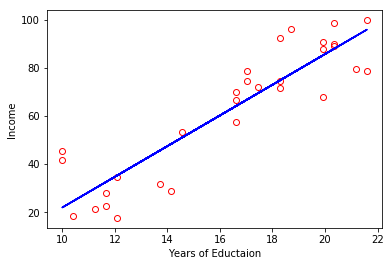

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression

%matplotlib inline

lr_yearsOfEdu = LinearRegression();
lr_combination = LinearRegression();
lr_seniority = LinearRegression();
lr = LinearRegression();

# FilePath of the input csv file
filePath = "C:\\Users\\koteshwarlu.kethavat\\Desktop\\"
fileName=filePath+"Income2.csv"
# print(fileName)
# File has the following headers 
#Education,Seniority,Income
income_data = pd.read_csv(fileName);
#print(income_data.head())
#print(income_data.describe())
#print(np.mean(income_data["Income"]))
# Fit the data into the Linear Regression.
lr_yearsOfEdu.fit(X=income_data[['Education']], y= income_data['Income'])
lr_seniority.fit(X=income_data[['Seniority']], y= income_data['Income'])
# After fitting the trained data, Plot the chart
plt.plot(income_data.Education, income_data.Income, 'or', mfc='none');

# Model as Y ≈β0 + β1X1 + β2X2 + ...+ βpXp.
plt.plot(income_data.Education, lr_yearsOfEdu.intercept_+lr_yearsOfEdu.coef_*income_data.Education, '-b');
plt.xlabel('Years of Eductaion');
plt.ylabel('Income')

#Plot for the Income vs Seniority
'''plt2.plot(income_data.Seniority, lr_seniority.intercept_+lr_seniority.coef_*income_data.Seniority, '-b');
plt2.xlabel('Years of Seniority');
plt2.ylabel('Income')
'''
# Now Predict the income based on the Input of Years of Education
# Lets try with 18 years of Experince
yearsOfEducation_X  = np.array([18])
#Reshape to Matrix of 1x1
answer2 = lr_yearsOfEdu.predict(yearsOfEducation_X.reshape(1,1));
# print(type(answer2))
print(answer2[0])
print("New Individual with 18 years of Education will have the Income  as ", round(answer2[0]));
print("************ Solutions for 4th ***********")
lr_combination.fit(X=income_data[['Education','Seniority']], y= income_data['Income'])
combinationPredictor_X = np.array([18,60])
answer4 = lr_combination.predict(combinationPredictor_X.reshape(1,2));
# print(round(answer4[0]))
print("New Individual with 18years of Education & 60 years of Seniority will  have the Income as ", round(answer4[0]));

model = smf.ols(formula='Income ~ Education + Seniority' , data=income_data)
lr = model.fit();
print(lr.summary());